In [4]:
import pandas as pd
data= pd.read_csv("feeds_nfu.csv")

In [5]:
data

,created_at,entry_id,field1,field2,field3,field4,field5,field6,latitude,longitude,elevation,status
0,2023-04-27T20:36:41+05:30,1,0,0,156,1,0,0,NaN,NaN,29.000000,0
1,2023-04-27T20:37:18+05:30,2,476,395,470,516,504,413,NaN,NaN,462.333333,0
2,2023-04-27T20:37:33+05:30,3,0,50,3,0,24,26,NaN,NaN,17.166667,0
3,2023-04-27T20:37:50+05:30,4,619,265,657,641,432,438,NaN,NaN,508.666667,1
4,2023-05-05T17:44:41+05:30,5,2,2,2,2,2,2,NaN,NaN,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
544,2023-05-10T17:46:13+05:30,545,9,5,5,6,5,6,NaN,NaN,6.000000,0
545,2023-05-10T17:49:48+05:30,546,0,387,367,166,182,288,NaN,NaN,231.666667,0
546,2023-05-10T18:16:02+05:30,547,10,11,9,10,10,9,NaN,NaN,9.833333,0
547,2023-05-10T18:16:18+05:30,548,9,9,9,10,0,0,NaN,NaN,6.166667,0


In [6]:
data.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,latitude,longitude,elevation,status
0,2023-04-27T20:36:41+05:30,1,0,0,156,1,0,0,NaN,NaN,29.000000,0
1,2023-04-27T20:37:18+05:30,2,476,395,470,516,504,413,NaN,NaN,462.333333,0
2,2023-04-27T20:37:33+05:30,3,0,50,3,0,24,26,NaN,NaN,17.166667,0
3,2023-04-27T20:37:50+05:30,4,619,265,657,641,432,438,NaN,NaN,508.666667,1
4,2023-05-05T17:44:41+05:30,5,2,2,2,2,2,2,NaN,NaN,2.000000,0


In [11]:
df=data.drop(['latitude','longitude','elevation'], axis=1)

In [12]:
df=df.drop(['created_at','entry_id'], axis=1)

In [13]:
df

,field1,field2,field3,field4,field5,field6,status
0,0,0,156,1,0,0,0
1,476,395,470,516,504,413,0
2,0,50,3,0,24,26,0
3,619,265,657,641,432,438,1
4,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...
544,9,5,5,6,5,6,0
545,0,387,367,166,182,288,0
546,10,11,9,10,10,9,0
547,9,9,9,10,0,0,0


In [14]:
%matplotlib inline

df['field2'].hist

<bound method hist_series of 0        0
1      395
2       50
3      265
4        2
      ... 
544      5
545    387
546     11
547      9
548      4
Name: field2, Length: 549, dtype: int64>

<AxesSubplot:>

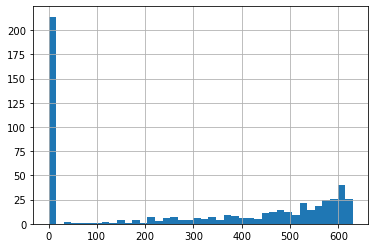

In [16]:
%matplotlib inline

data['field2'].hist(bins=40)


In [17]:
df.tail()

,field1,field2,field3,field4,field5,field6,status
544,9,5,5,6,5,6,0
545,0,387,367,166,182,288,0
546,10,11,9,10,10,9,0
547,9,9,9,10,0,0,0
548,498,4,354,427,275,155,0


In [18]:
df.tail()

,field1,field2,field3,field4,field5,field6,status
544,9,5,5,6,5,6,0
545,0,387,367,166,182,288,0
546,10,11,9,10,10,9,0
547,9,9,9,10,0,0,0
548,498,4,354,427,275,155,0


In [19]:
df.columns

Index(['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'status'], dtype='object')

In [20]:
df.index


RangeIndex(start=0, stop=549, step=1)

In [21]:
df1=df

In [23]:
df2=df1.drop(['status'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X=df2
Y=df1['status']
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.50)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)

C:\Users\HOD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  99.27272727272727


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train) 
n=60
XX=x_test.iloc[n,:]
#X=X.reshape(-1,1);
XX=XX.values.reshape(1,-1)
predicted = knn.predict(XX)

print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print( y_test)


Predictions from the classifier:
[0]
Target values:
115    1
54     1
245    0
5      0
230    0
      ..
15     0
74     1
289    0
25     0
293    0
Name: status, Length: 275, dtype: int64


C:\Users\HOD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\HOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [32]:
X=x_test.iloc[3,:]
X=X.values.reshape(-1,1)
X

array([[1],
       [2],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [33]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [34]:
print( y_pred)

[1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [35]:
x_test

,field1,field2,field3,field4,field5,field6
115,622,437,553,609,570,588
54,577,489,526,551,534,506
245,251,0,0,128,138,0
5,1,2,1,1,1,1
230,627,573,5,314,600,286
...,...,...,...,...,...,...
15,132,0,0,65,65,1
74,590,463,558,581,528,521
289,522,333,0,262,439,189
25,4,4,4,3,3,3
